#### DB 연결

In [3]:
import psycopg2

conn = psycopg2.connect(
  'host=localhost port=5432 dbname=source user=postgres password=postgres'
)
conn.set_session(autocommit=True)
cur = conn.cursor()

#### 데이터 읽기

In [4]:
import pandas as pd

cur.execute(
  f'''
  select *
  from lot_public_price
  where substr(pnu,1,2) = '11'
  '''
)
lpp_dt = pd.DataFrame(
  cur.fetchall(),
  columns=[
    col.name
    for col
    in cur.description
  ]
)

In [5]:
lpp_dt

,year,stdmt,pnu,land_seqno,sgg_cd,land_loc_cd,land_gbn,bobn,bubn,adm_umd_cd,pnilp,jimok,parea,spfc1,spfc2,land_use,geo_hl,geo_form,road_side,upload_at
0,2022,01,1111017100102160001,999999,11110,17100,1,0216,0001,913,8140000,08,80,14,00,210,02,04,08,2022-09-13 17:28:38.492385
1,2022,01,1111016600101180003,999999,11110,16600,1,0118,0003,912,3985000,08,148.8,14,00,130,02,04,10,2022-09-13 17:28:38.492385
2,2022,01,1111017300100520004,999999,11110,17300,1,0052,0004,914,4535000,08,112.1,14,00,110,02,04,09,2022-09-13 17:28:38.492385
3,2022,01,1111017400100250006,999999,11110,17400,1,0025,0006,915,12450000,08,74,15,00,210,02,04,03,2022-09-13 17:28:38.492385
4,2022,01,1111017400100230673,999999,11110,17400,1,0023,0673,915,2760000,08,138.8,14,00,110,04,04,10,2022-09-13 17:28:38.492385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903772,2022,01,1111013700102640000,11027,11110,13700,1,0264,0000,910,13400000,08,23.1,22,00,310,02,05,02,2022-09-13 17:28:38.492385
903773,2022,01,1111013700102640001,11028,11110,13700,1,0264,0001,910,13400000,14,4.3,22,00,310,02,05,02,2022-09-13 17:28:38.492385
903774,2022,01,1111013700102650001,11029,11110,13700,1,0265,0001,910,13400000,14,5.6,22,00,310,02,05,02,2022-09-13 17:28:38.492385
903775,2022,01,1111013700102660000,11030,11110,13700,1,0266,0000,910,13400000,14,39.7,22,00,310,02,05,02,2022-09-13 17:28:38.492385


### 항목별 특성 확인

In [6]:
lpp_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903777 entries, 0 to 903776
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   year         903777 non-null  object        
 1   stdmt        903777 non-null  object        
 2   pnu          903777 non-null  object        
 3   land_seqno   903777 non-null  object        
 4   sgg_cd       903777 non-null  object        
 5   land_loc_cd  903777 non-null  object        
 6   land_gbn     903777 non-null  object        
 7   bobn         903777 non-null  object        
 8   bubn         903777 non-null  object        
 9   adm_umd_cd   903777 non-null  object        
 10  pnilp        903777 non-null  object        
 11  jimok        903777 non-null  object        
 12  parea        903777 non-null  object        
 13  spfc1        903777 non-null  object        
 14  spfc2        903777 non-null  object        
 15  land_use     903777 non-null  obje

숫자형 데이터의 확인을 위해 형변환

In [7]:
lpp_dt.land_seqno = lpp_dt.land_seqno.astype('int')
lpp_dt.pnilp = lpp_dt.pnilp.astype('int')
lpp_dt.parea = lpp_dt.parea.astype('float')

In [8]:
lpp_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903777 entries, 0 to 903776
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   year         903777 non-null  object        
 1   stdmt        903777 non-null  object        
 2   pnu          903777 non-null  object        
 3   land_seqno   903777 non-null  int32         
 4   sgg_cd       903777 non-null  object        
 5   land_loc_cd  903777 non-null  object        
 6   land_gbn     903777 non-null  object        
 7   bobn         903777 non-null  object        
 8   bubn         903777 non-null  object        
 9   adm_umd_cd   903777 non-null  object        
 10  pnilp        903777 non-null  int32         
 11  jimok        903777 non-null  object        
 12  parea        903777 non-null  float64       
 13  spfc1        903777 non-null  object        
 14  spfc2        903777 non-null  object        
 15  land_use     903777 non-null  obje

### 기초통계량 확인

In [9]:
import numpy as np

lpp_dt.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
land_seqno,903777.0,5.165061e+04,1.773939e+05,1.0,9016.0,18065.0,28652.0,999999.0
pnilp,903777.0,4.943092e+06,5.347416e+06,4950.0,2537000.0,3806000.0,5730000.0,189000000.0
parea,903777.0,6.647184e+02,1.188706e+04,0.1,75.4,140.4,240.7,4416995.0


- land_seqno(토지일련번호)는 고유값이 아니며 활용성이 없는 항목
- pnilp(공시지가)는 테이블 내 종속변수의 특성이 강하며 단위가 크고 범위가 넓은 편
- parea(토지면적)는 대체로 값이 작으나 최대값이 이상치 수준으로 큼

In [10]:
lpp_dt.describe(include=np.object).transpose()

C:\Users\Bob\AppData\Local\Temp/ipykernel_26644/583696310.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lpp_dt.describe(include=np.object).transpose()


,count,unique,top,freq
year,903777,1,2022,903777
stdmt,903777,1,01,903777
pnu,903777,903777,1111017100102160001,1
sgg_cd,903777,25,11290,54837
land_loc_cd,903777,87,10100,115836
land_gbn,903777,9,1,885434
bobn,903777,3797,0001,14270
bubn,903777,3834,0000,53972
adm_umd_cd,903777,186,000,215937
jimok,903777,25,08,675581


- year(년도)는 '2022' 유일값
- stdmt(기준월)는 '01' 유일값
- pnu(필지고유번호)는 'count == unique'인 primary key로 분석 내 ID로 사용
- sgg_cd(시군구코드)는 'unique:25'로 서울 자치구 25개의 코드
- land_loc_cd(토지소재지코드)는 'unique:87'로 서울 자치구 내 법정동 코드. 단 sgg_cd의 하위 분류코드로서 동일한 값이어도 다른 법정동을 의미할 수 있음
- land_gbn(토지구분), bobn(본번), bubn(부번)은 토지 주소의 부분 항목
- adm_umd_cd(행정읍면동코드)는 land_loc_cd가 나타내는 법정동이 아닌 행정동 기준의 코드
- jimok(지목)는 25개 지목 구분 코드
- spfc1(용도지역1), spfc2(용도지역2)는 용도지역 15개 구분 코드. spfc2는 공란에 해당되는 '00'이 추가되어 unique값이 1 높음
- land_use(토지이용상황)는 토지의 이용상황 44개 분류 코드
- geo_hl(지형고저)은 토지의 지형고저 6개 분류 코드
- geo_form(지형형상)은 토지의 지형형상 7개 분류 코드
- road_side(도로접면)은 토지에 접한 도로에 대한 13개 분류 코드

### 지역별 데이터 분포

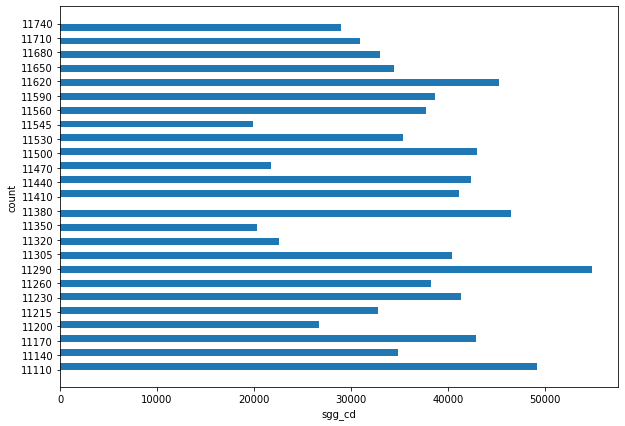

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.hist(
  lpp_dt.sgg_cd,
  bins=50,
  orientation='horizontal'
)
plt.xlabel('sgg_cd')
plt.ylabel('count')
plt.show()

In [21]:
print(lpp_dt.sgg_cd.value_counts().mean())
print(lpp_dt.sgg_cd[(lpp_dt.sgg_cd=='11680') | (lpp_dt.sgg_cd=='11305')].value_counts())
print(lpp_dt.land_loc_cd[((lpp_dt.sgg_cd=='11680') & (lpp_dt.land_loc_cd=='10800')) | ((lpp_dt.sgg_cd=='11305') & (lpp_dt.land_loc_cd=='10300'))].value_counts())

36151.08
11305    40469
11680    33051
Name: sgg_cd, dtype: int64
10300    15884
10800     5574
Name: land_loc_cd, dtype: int64


- 전체 데이터 개수 : 903,777
- 구별 데이터 개수 평균 : 36,151
- 강남구 데이터 개수 : 33,051
  - 강남구 논현동 데이터 개수 : 5,574
- 강북구 데이터 개수 : 40,469
  - 강북구 수유동 데이터 개수 : 15,884
※ 지역코드표에서 강남구 논현동과 강북구 수유동은 각 '1168010800', '1130510300'

### 활용할 항목 및 데이터 고민
- 약 90만개로 모두 다 사용할 필요는 없음(책 예시는 49개)
  - 구별 평균 3만개가 넘으므로 구 내에 동 단위로 분류하여 사용
- 공시지가 차이를 활용하기 위해 격차가 큰 강남구와 강북구 선정
- 토지의 지역적 분류 모델을 만들고자 sgg_cd를 종속변수로 사용
  - 지역적 차이가 예상되는 강남구 논현동과 강북구 수유동 선정
- pnilp와 parea는 숫자형 데이터이므로 분류 예제를 구현해볼 수 있음
- 데이터 단순화를 위해 jimok, spfc1 두 항목은 필터를 거쳐 사용함
  - jimok == '08' # '대지'
  - spfc1 == '14' # '제2종일반주거지역'
- 모두 동일시점 '2022년 1월' 기준으로 시계열 데이터는 아님

In [22]:
lpp_dt_2sgg = lpp_dt[((lpp_dt.sgg_cd=='11680') & (lpp_dt.land_loc_cd=='10800')) | ((lpp_dt.sgg_cd=='11305') & (lpp_dt.land_loc_cd=='10300'))][(lpp_dt.jimok=='08') | (lpp_dt.spfc1=='14')]
print(lpp_dt_2sgg.sgg_cd.value_counts())

11305    14511
11680     5276
Name: sgg_cd, dtype: int64


C:\Users\Bob\AppData\Local\Temp/ipykernel_26644/638177381.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lpp_dt_2sgg = lpp_dt[((lpp_dt.sgg_cd=='11680') & (lpp_dt.land_loc_cd=='10800')) | ((lpp_dt.sgg_cd=='11305') & (lpp_dt.land_loc_cd=='10300'))][(lpp_dt.jimok=='08') | (lpp_dt.spfc1=='14')]


In [23]:
lpp_dt_2sgg['is_gangnam'] = lpp_dt_2sgg.sgg_cd == '11680'
print(lpp_dt_2sgg.is_gangnam.value_counts())

False    14511
True      5276
Name: is_gangnam, dtype: int64


- jimok, spfc1 필터를 거쳐 강남구(논현동) 5,276개, 강북구(수유동) 14,511개 데이터 확보
- 분류에 사용할 pnilp(공시지가), parea(토지면적)
- is_gangnam 항목은 강남구인 경우 True, 강북구인 경우 False (타겟데이터)

### github에 데이터 올려놓기
- DB를 활용할 수도 있으나, 학습예제와 동일한 작업을 하기위해 csv 데이터로 github에 올려놓음

In [15]:
def to_csv_from_dt_column(pd_col, save_file_name):
  f = open(save_file_name, 'w')
  f.write(
    ','.join(pd_col.to_list())
  )
  f.close()

In [16]:
to_csv_from_dt_column(
  lpp_dt_2sgg.pnilp.astype('string'),
  'lpp_pnilp.csv'
)
to_csv_from_dt_column(
  lpp_dt_2sgg.parea.astype('string'),
  'lpp_parea.csv'
)
to_csv_from_dt_column(
  lpp_dt_2sgg.is_gangnam.astype('int').astype('string'),
  'lpp_is_gangnam.csv'
)